In [7]:
import scipy
from numpy import *
from matplotlib.pyplot import *
from scipy import integrate
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

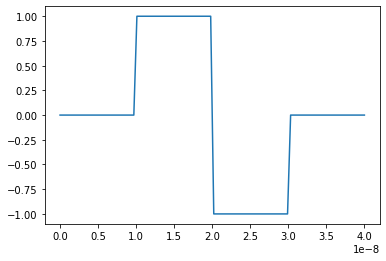

In [8]:
# Parâmetros do sistema
N, zf, w = 100, 40e-9, 10e-9
z, dz = linspace(0,zf,N), zf/(N-1)
q = (1.602176634e-19)
epsilon, dop = 55.26349406e6*q**2, 1e18*q*1e6

dens = zeros(N)
dens[z>w],dens[z>2*w],dens[z>3*w]=dop,-dop,0

diel = ones(N)
diel = insert(diel,0,diel[0])
diel = append(diel,diel[-1])
plot(z,dens/(1e18*q*1e6))

In [9]:
def poisson1(densi): # Condição de Dirichlet
    K = -(2*dz**2)*densi/epsilon
    
    M1, M2 = -(diel[0:N]+2*diel[1:N+1]+diel[2:N+2]), (diel[1:N+1]+diel[2:N+2])
    M  = diags([M2, M1, M2], [1, 0, -1], shape=(N, N))
    Vn, trash = scipy.sparse.linalg.cg(M, K)
    return densi, q*Vn
def poisson2(densi): # Condição de Newmann
    K = -(dz**2)*densi/epsilon
    Mei, M1 = -(diel[0:N]+diel[1:N+1]), diel[1:N+1]
    Mei[-1] += diel[-1]
    Mei[0]  += diel[0]
    M  = diags([M1, Mei, M1], [-1, 0, 1], shape=(N, N)).toarray()
    Vn, trash = scipy.sparse.linalg.cg(M, K)
    return densi, q*Vn

In [10]:
dens1, potencial1 = poisson1(dens)
dens2, potencial2 = poisson2(dens)

([<matplotlib.lines.Line2D at 0x1f65b367c70>],
 [<matplotlib.lines.Line2D at 0x1f65b367f70>])

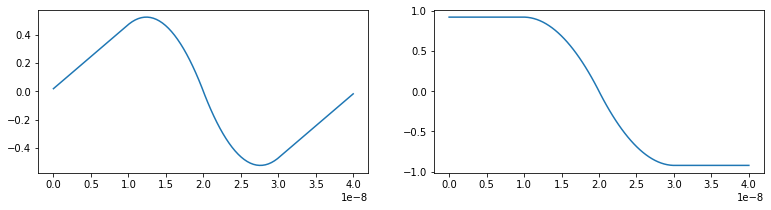

In [15]:
f, (ax1, ax2) = subplots(1, 2,figsize=(13,3))
ax1.plot(z,potencial1), ax2.plot(z,potencial2)